In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('/Users/Corentin/Desktop/statapp/df_merge.csv', low_memory=False, index_col='Unnamed: 0')
df.drop(df.index[1083398], inplace=True)
df

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,...,reliability_sender_A,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,jour_année_tx,jour_mois_tx,année_tx,mois_tx
0,33859.0,6540.0,9883.0,586.61,2018-04-07,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-71.348819,0.000000,219.870222,97.0,7.0,2018.0,4.0
1,40948.0,6540.0,9883.0,586.61,2018-04-14,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,119.650647,-92.223342,0.000000,219.870222,104.0,14.0,2018.0,4.0
2,42015.0,6540.0,9883.0,586.61,2018-04-21,CHECK,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-95.501115,0.000000,219.870222,111.0,21.0,2018.0,4.0
3,50884.0,6540.0,9883.0,586.61,2018-04-28,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-99.820685,0.000000,219.870222,118.0,28.0,2018.0,4.0
4,60406.0,6540.0,9883.0,586.61,2018-05-05,WIRE,A,Aaron,Behrmann,FR,...,1.000000,1.000000,40.656996,-99.908519,0.000000,219.870222,125.0,5.0,2018.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083393,1111899.0,NaN,3394.0,129.24,2021-05-22,CHECK,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,142.0,22.0,2021.0,5.0
1083394,1182395.0,NaN,3394.0,129.24,2021-07-31,WIRE,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,212.0,31.0,2021.0,7.0
1083395,1248997.0,NaN,3394.0,129.24,2021-10-09,WIRE,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,282.0,9.0,2021.0,10.0
1083396,1313587.0,NaN,3394.0,129.24,2021-12-18,CHECK,C,Zenobia,Janak,FR,...,1.000000,1.000000,-76.651672,-73.518564,-28.671560,0.000000,352.0,18.0,2021.0,12.0


In [3]:
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d', errors = 'ignore')
df['sender_birth_date'] = pd.to_datetime(df.sender_birth_date, format='%Y-%m-%d', errors = 'ignore')
df['receiver_birth_date'] = pd.to_datetime(df.receiver_birth_date, format='%Y-%m-%d', errors = 'ignore')

In [4]:
df.sort_values(by='timestamp', ascending=True, inplace=True)

In [5]:
df['is_alert_solo'].value_counts()

False    1076270
True        7128
Name: is_alert_solo, dtype: int64

In [6]:
def filter_df(time, df_to_filter):
    " Fonction qui renvoie un df trié en ne prenant que les dates du passé "
    " mettre le time sous forme 'yyyy-mm-dd' "
    df_1 = df_to_filter[df_to_filter['timestamp']<time].copy()
    return df_1

## Preprocessing 

### Sélection des features



In [7]:
df.columns

Index(['tx_id', 'sender_account_id', 'receiver_account_id', 'tx_amount',
       'timestamp', 'tx_type', 'sender_bank_id', 'sender_first_name',
       'sender_last_name', 'sender_country_code', 'sender_birth_date',
       'sender_zip_code', 'receiver_bank_id', 'receiver_first_name',
       'receiver_last_name', 'receiver_country_code', 'receiver_birth_date',
       'receiver_zip_code', 'is_alert_solo', 'is_alert_pooled',
       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',
       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_

In [8]:
variables_to_keep = ['tx_amount','timestamp', 'tx_type',
       
       'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date',

       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',

       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',

       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',

       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',

       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',

       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 

       'ecarts_tx_received_A','ecarts_tx_received_B', 
       'ecarts_tx_sent_A', 'ecarts_tx_sent_B',

       'sender_bank_id','receiver_bank_id',

       'is_alert_solo', 'is_alert_pooled']

variables_to_drop = ['tx_id', 'sender_account_id', 'receiver_account_id', 'sender_first_name',
       'sender_last_name', 'sender_zip_code', 'receiver_first_name',
       'receiver_last_name', 'receiver_zip_code']

df_bis=df[variables_to_keep].copy()

In [9]:
df_bis['is_alert_pooled']= df_bis['is_alert_pooled'].apply( lambda x : int(x))
df_bis['is_alert_solo']= df_bis['is_alert_solo'].apply( lambda x : int(x))

In [10]:
#Variable catégorielle tx_type

tx_type_ = pd.get_dummies(df_bis['tx_type'],drop_first=True)
df_bis= pd.concat([df_bis, tx_type_], axis=1)
df_bis.drop(['tx_type'],axis=1,inplace=True)
df_bis.rename(columns={'WIRE': 'tx_type', 
                           }, inplace=True)
df_bis.head(3)


,tx_amount,timestamp,sender_country_code,sender_birth_date,receiver_country_code,receiver_birth_date,jour_année_tx,jour_mois_tx,année_tx,mois_tx,...,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,sender_bank_id,receiver_bank_id,is_alert_solo,is_alert_pooled,tx_type
191519,10.00,2018-03-03,FR,1921-11-08,FR,1918-11-09,62.0,3.0,2018.0,3.0,...,1.0,-97.817547,-93.308575,0.0,-91.674992,B,A,0,0,1
643274,8.41,2018-03-03,FR,1931-04-14,FR,1919-12-25,62.0,3.0,2018.0,3.0,...,NaN,-87.971968,NaN,0.0,NaN,A,C,0,0,1
643275,8.41,2018-03-03,FR,1931-04-14,FR,1935-09-02,62.0,3.0,2018.0,3.0,...,NaN,-93.501275,NaN,0.0,NaN,A,C,0,0,0


In [11]:
# Country_code 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
L=['sender_country_code','receiver_country_code', 'sender_bank_id','receiver_bank_id']
for i in L: 
    le.fit(df_bis[i])
    le.classes_
    df_bis[i]= le.transform(df_bis[i])
    display(pd.DataFrame(index= [j for j in range(len(df_bis[i].unique()))],
                         data=le.inverse_transform([j for j in range(len(df_bis[i].unique()))]), columns= [i]))

,sender_country_code
0,AE
1,AF
2,AR
3,AT
4,AU
...,...
75,YE
76,ZA
77,ZM
78,ZW


,receiver_country_code
0,AE
1,AF
2,AR
3,AT
4,AU
...,...
78,YE
79,ZA
80,ZM
81,ZW


,sender_bank_id
0,A
1,B
2,C


,receiver_bank_id
0,A
1,B
2,C


## Gestion des valeurs manquantes 

In [12]:
# On enlève les transactions avec un montant nul 
df_bis = df_bis.drop(df_bis[df_bis.tx_amount==0].index)

In [13]:
df_bis[['receiver_country_code','sender_country_code']].dropna(inplace=True)

/var/folders/ls/kz9r5k393xg8d3p1krqjx50m0000gn/T/ipykernel_12416/457886057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bis[['receiver_country_code','sender_country_code']].dropna(inplace=True)


##### Gestion des valeurs manquantes  : 
- pour les valeurs count_cum qui compte le nbre de tx contenues dans A ou B en fonction de _A ou _B, on choisit de mettre la valeur 0 
- pour la reliability concernant les personnes n'apparaissant pas dans A par exemple, on choisit de mettre la valeur 1 


######  pour l'écart entre les montants passés et la tx on décide de mettre 0 quand il n'y a pas d'historique  

In [14]:
for i in ['count_cum_receiver_A','count_cum_receiver_B','count_cum_sender_A','count_cum_sender_B']: 
    df_bis[i]=df_bis[i].fillna(0)

for i in ['reliability_receiver_A','reliability_receiver_B','reliability_sender_A', 'reliability_sender_B']:
    df_bis[i]=df_bis[i].fillna(1)
    
for i in ['ecarts_tx_received_A','ecarts_tx_received_B','ecarts_tx_sent_A', 'ecarts_tx_sent_B']:
    df_bis[i]=df_bis[i].fillna(0)

In [15]:
for i in ['count_cum_receiver_A','count_cum_receiver_B','count_cum_sender_A','count_cum_sender_B']:
    df_bis[i]=df_bis[i].fillna(0)

On identifie les tx comme ayant des NaNs comme étant les tx pour lesquelles un client (de A) qui n'apparaît pas dans les données de la banque B. 

Pour les valeurs de médianes et de moyennes, nous faisons le choix de mettre la valeur de la tx, à savoir tx_amount. 
Pour les valeurs des variances, nous décidons de mettre 0. 
De même pour les valeurs de nb_is_alert_solo_receiver. 

In [16]:
for i in ['median_cum_sender_B','mean_cum_sender_B','median_cum_receiver_B','mean_cum_receiver_B', 'median_cum_sender_A','mean_cum_sender_A','median_cum_receiver_A','mean_cum_receiver_A']:
    df_bis[i]=df_bis[i].fillna(df_bis['tx_amount'])


df_bis[['variance_cum_sender_B', 'variance_cum_receiver_B']]= df_bis[['variance_cum_sender_B', 'variance_cum_receiver_B']].fillna(0)
df_bis[['variance_cum_sender_A', 'variance_cum_receiver_A']]= df_bis[['variance_cum_sender_A', 'variance_cum_receiver_A']].fillna(0)

df_bis[['nb_is_alert_solo_receiver_A','nb_is_alert_solo_sender_A']]= df_bis[['nb_is_alert_solo_receiver_A','nb_is_alert_solo_sender_A']].fillna(0)
df_bis[['nb_is_alert_solo_receiver_B','nb_is_alert_solo_sender_B']]= df_bis[['nb_is_alert_solo_receiver_B','nb_is_alert_solo_sender_B']].fillna(0)

On modifie les écarts en reprenant le code de la partie précédente `Base_clients_enrichissement` en prenant en compte le remplacement des NaNs ci-dessus.

In [17]:
#Écart
df_bis['ecarts_tx_received_A']= (df_bis.tx_amount - df_bis.median_cum_receiver_A)/df_bis.median_cum_receiver_A*100
df_bis['ecarts_tx_received_B']= (df_bis.tx_amount - df_bis.median_cum_receiver_B)/df_bis.median_cum_receiver_B*100
df_bis['ecarts_tx_sent_A']= (df_bis.tx_amount - df_bis.median_cum_sender_A)/df_bis.median_cum_sender_A*100
df_bis['ecarts_tx_sent_B']= (df_bis.tx_amount - df_bis.median_cum_sender_B)/df_bis.median_cum_sender_B*100

df_bis = df_bis.replace([np.inf, -np.inf], np.nan)

# supprimer les lignes avec des valeurs manquantes (NaN)
df_bis.dropna(inplace=True)

In [18]:
df_bis[['ecarts_tx_sent_A','ecarts_tx_sent_B','ecarts_tx_received_A','ecarts_tx_received_B']].describe()

,ecarts_tx_sent_A,ecarts_tx_sent_B,ecarts_tx_received_A,ecarts_tx_received_B
count,1.083359e+06,1.083359e+06,1.083359e+06,1.083359e+06
mean,8.354743e+04,1.431037e+05,1.761403e+05,1.317502e+05
std,3.636522e+06,4.546692e+06,4.181801e+06,3.493449e+06
min,-9.999997e+01,-9.999996e+01,-9.999998e+01,-9.999998e+01
25%,0.000000e+00,0.000000e+00,-7.629572e+01,-4.410902e+01
50%,0.000000e+00,0.000000e+00,-6.162932e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,1.892975e+02,2.522332e+01
max,4.210751e+08,6.468323e+08,4.169870e+08,4.210751e+08


In [19]:
df_bis[df_bis.isnull().any(axis=1)]

,tx_amount,timestamp,sender_country_code,sender_birth_date,receiver_country_code,receiver_birth_date,jour_année_tx,jour_mois_tx,année_tx,mois_tx,...,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,sender_bank_id,receiver_bank_id,is_alert_solo,is_alert_pooled,tx_type


In [20]:
df_bis.columns

Index(['tx_amount', 'timestamp', 'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date', 'jour_année_tx',
       'jour_mois_tx', 'année_tx', 'mois_tx', 'count_cum_sender_A',
       'median_cum_sender_A', 'mean_cum_sender_A', 'variance_cum_sender_A',
       'nb_is_alert_solo_sender_A', 'count_cum_sender_B',
       'median_cum_sender_B', 'mean_cum_sender_B', 'variance_cum_sender_B',
       'nb_is_alert_solo_sender_B', 'count_cum_receiver_A',
       'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_receiver_A', 'reliability_receiver_B',
       'reliability_sender_A', 'reliability_sender_B', 'ecarts_tx_received_A',
       'ecarts_tx_received_B', 'ecarts_tx_sent_A', 'ecarts_tx_sent_B',
       'sender_bank_id', 'receiver_bank_

## On va s'intéresser à `is_alert_pooled`

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
import datetime 

def train_test_split_time(df_to_split,time,delta):
    " fonction qui prend en arg un data frame à split, une date à partir de laquelle on sépare train et test, ainsi qu'un horizon "

    time_1_month = time + datetime.timedelta(days=delta)
    df = filter_df(time, df_to_split)

    X_train=df.drop(['is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp'],axis=1)
    y_train= df['is_alert_pooled']

    df4 = df_to_split[(df_to_split.timestamp<time_1_month)&(df_to_split.timestamp>=time)]
    X_test = df4.drop(['is_alert_pooled','is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp'],axis=1)
    y_test = df4['is_alert_pooled']
    print("% Test/(Test + Train) : "+  str(len(X_test)/(len(X_train)+len(X_test))*100))

    return(X_train, X_test, y_train, y_test)

In [47]:
# On fixe une date t 
# On va prédire le caractère frauduleux de la tx en ne prenant que les tx passées 
import datetime

#On fixe la date initiale
time = datetime.datetime(2019, 5, 16)
#On fixe l'horizon
delta= 200

X_train, X_test, y_train, y_test = train_test_split_time(df_bis,time,delta)

X_t= X_train.copy()

% Test/(Test + Train) : 31.625843289145894


In [48]:
X_train.describe()

,tx_amount,sender_country_code,receiver_country_code,jour_année_tx,jour_mois_tx,année_tx,mois_tx,count_cum_sender_A,median_cum_sender_A,mean_cum_sender_A,...,reliability_sender_A,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,sender_bank_id,receiver_bank_id,is_alert_solo,tx_type
count,338409.000000,338409.000000,338409.000000,338409.000000,338409.000000,338409.000000,338409.000000,338409.000000,3.384090e+05,3.384090e+05,...,338409.000000,338409.000000,3.384090e+05,3.384090e+05,3.384090e+05,3.384090e+05,338409.000000,338409.000000,338409.000000,338409.000000
mean,928.916289,28.317929,29.217414,170.377741,15.368678,2018.306635,6.126814,50.927803,1.849975e+03,6.394477e+03,...,0.993647,0.996008,1.387115e+03,1.009932e+03,6.294100e+02,1.046648e+03,0.831450,0.755834,0.006643,0.832640
std,6985.622193,4.083205,3.542846,101.954315,8.842213,0.461097,3.342354,72.138643,5.238110e+04,1.475459e+05,...,0.025915,0.020696,2.310024e+04,2.038211e+04,2.058594e+04,2.191131e+04,0.857799,0.838095,0.081233,0.373297
min,1.840000,0.000000,1.000000,5.000000,1.000000,2018.000000,1.000000,1.000000,1.840000e+00,1.840000e+00,...,0.000000,0.000000,-9.999998e+01,-9.999996e+01,-9.999978e+01,-9.999996e+01,0.000000,0.000000,0.000000,0.000000
25%,24.960000,28.000000,29.000000,89.000000,8.000000,2018.000000,3.000000,12.000000,2.718000e+01,2.717000e+01,...,1.000000,1.000000,-7.603704e+01,-4.699778e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000
50%,158.830000,28.000000,29.000000,146.000000,15.000000,2018.000000,5.000000,30.000000,1.606600e+02,1.605800e+02,...,1.000000,1.000000,-5.841362e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,1.000000
75%,443.380000,28.000000,29.000000,258.000000,23.000000,2019.000000,9.000000,56.000000,4.489200e+02,4.489200e+02,...,1.000000,1.000000,1.873245e+02,2.393239e+01,0.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,1.000000
max,434008.620000,79.000000,82.000000,363.000000,31.000000,2019.000000,12.000000,870.000000,1.459243e+07,1.121475e+07,...,1.000000,1.000000,2.739100e+06,3.844086e+06,4.334749e+06,2.339465e+06,2.000000,2.000000,1.000000,1.000000


### Scaling 

`RobustScaler` est insensible aux outliers 
On note IQR : l'écart interquartile (Q3 -Q1) 
On a : 

$$ X_{scaled}=\frac{X - médiane}{IQR} $$

Et la médiane est beaucoup moins sensible aux outliers


Sauf que les outliers nous intéresse donc on préfère utiliser le `StandardScaler`

`StandardScaler` standardise chaque variable X : 
- la moyenne est nulle 
- l'écart type est égale à 1

    $$ X_{scaled}=\frac{X - \mu_X}{\sigma_X} $$

In [49]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #fit_transform is a easy way to do the following normally 
X_test= scaler.transform(X_test)

X_train = pd.DataFrame(scaler.fit_transform(X_train),  columns= X_t.columns)
X_test = pd.DataFrame(scaler.transform(X_test),  columns= X_t.columns)

<AxesSubplot:>

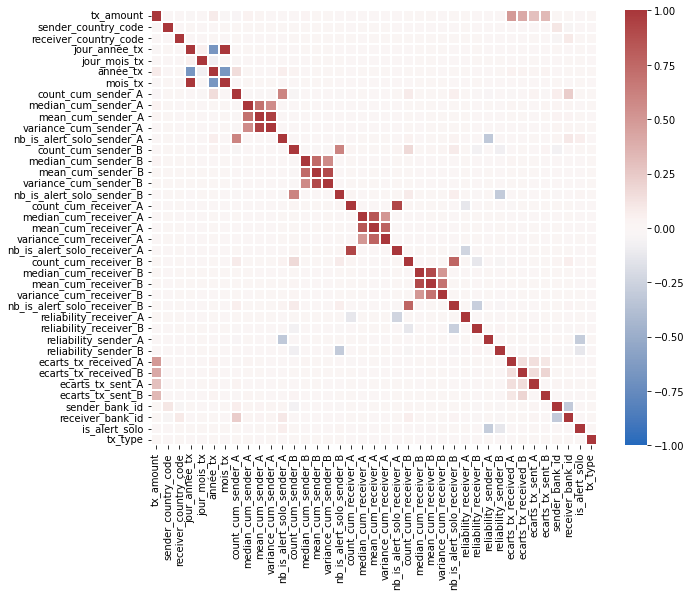

In [50]:
#Affichage visualisation classique des corrélations entre features
f, ax = plt.subplots(figsize=(10, 8))
# palette de couleurs de la colormap
cmap = sns.color_palette("vlag", as_cmap=True)

sns.heatmap(X_train.corr(), cmap= cmap, linewidths=.3, vmin=-1, vmax=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156306
           1       1.00      0.88      0.94       222

    accuracy                           1.00    156528
   macro avg       1.00      0.94      0.97    156528
weighted avg       1.00      1.00      1.00    156528

[[156306      0]
 [    26    196]]


<AxesSubplot:>

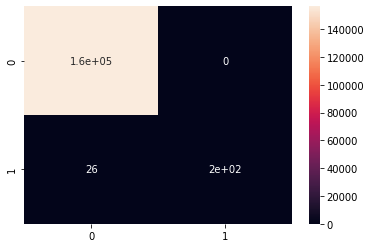

In [51]:
model = RandomForestClassifier()# n_estimators=50, max_depth=10, max_features = 15) 

model.fit(X_train, y_train) 

predictions= model.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
#sns.heatmap(confusion_matrix(y_train,model.predict(X_train)),annot=True)

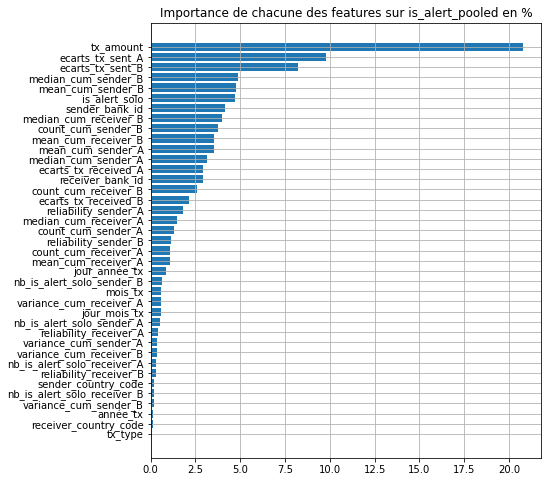

In [52]:
#RFClassifier
importances = model.feature_importances_

indices = np.argsort(importances)


fig, ax = plt.subplots(figsize=(7,8))
ax.barh(range(len(importances)), importances[indices]*100)
ax.set_yticks(range(len(importances)), colors='royalblue')
_ = ax.set_yticklabels(np.array(X_t.columns)[indices])
plt.grid()
plt.title("Importance de chacune des features sur is_alert_pooled en %")
plt.show()

## XGB

In [30]:
!pip install xgboost

In [31]:
import xgboost as xgb

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    156306
           1       1.00      0.95      0.98       222

    accuracy                           1.00    156528
   macro avg       1.00      0.98      0.99    156528
weighted avg       1.00      1.00      1.00    156528

[[156306      0]
 [    10    212]]


<AxesSubplot:>

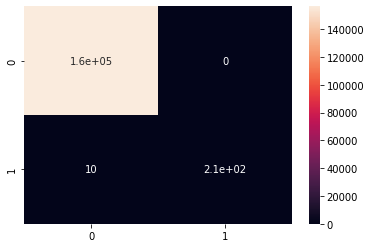

In [53]:
model = xgb.XGBClassifier()

model.fit(X_train, y_train) 

predictions= model.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

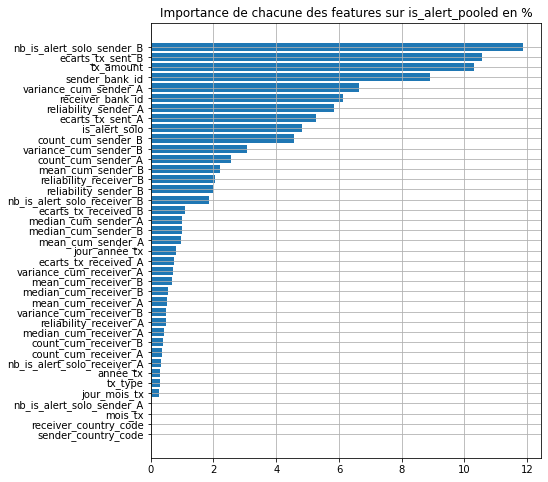

In [54]:
#XGB
importances = model.feature_importances_

indices = np.argsort(importances)


fig, ax = plt.subplots(figsize=(7,8))
ax.barh(range(len(importances)), importances[indices]*100)
ax.set_yticks(range(len(importances)), colors='royalblue')
_ = ax.set_yticklabels(np.array(X_t.columns)[indices])
plt.grid()
plt.title("Importance de chacune des features sur is_alert_pooled en %")
plt.show()

In [56]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score

In [57]:
recall=make_scorer(recall_score)
precision=make_scorer(precision_score)
f1=make_scorer(f1_score)

In [60]:
def score_cv(model, X_train,y_train,cv):
    " Objectif : renvoyer un df contenant la moyenne des scores recall et précision"
    " On prend en argument un modèle, X_train, y_train, et un nombre correspondant au nombre de splits souhaités" 
    
    scores_recall = cross_val_score(model, X_train, y_train, cv=cv, scoring=recall)
    scores_precision= cross_val_score(model, X_train, y_train, cv=cv, scoring=precision)
    scores_f1= cross_val_score(model, X_train, y_train, cv=cv, scoring=f1)
    df_score_cv=pd.DataFrame({'Moyennes' : [scores_recall.mean(), scores_precision.mean() , scores_f1.mean()],
                          'Ecart-Type': [scores_recall.std(), scores_precision.std(), scores_f1.std()] },
                        index=['Recall', 'Precision','f1'])
    return df_score_cv 

In [61]:
#Paramètres 
n_estimators =[100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000] #nombre d'arbres dans la forêt
max_features = ['sqrt', 'log2', None] #nombre max de features, je me sers de la doc sklearn pour connaître les valeurs possibles 
max_depth= [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None] #profondeur des arbres
min_samples_leaf=[1, 2, 4, 10, 50, 100 , 200, 500, 1000] #nombre d'observations mini représenté par chaque feuille
min_samples_split= [2, 5, 10, 100 ,200 , 500, 1000] #nombre mini d'observations requises pour diviser un noeud 
bootstrap=[True, False] #bootstrap resampling


param_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'min_samples_split': min_samples_split,
            'bootstrap': bootstrap}

#Modèle
clf=RandomForestClassifier(random_state=1)

# On tire ces paramètres aléatoirement parmis les valeurs proposées
# On évalue ces modèles par cross validation  
# On essaie n_itre tirages différents pour les paramètres

search= RandomizedSearchCV(estimator = clf, param_distributions = param_grid, 
                                n_iter = 1, cv = None, verbose=2, random_state=1, n_jobs = -1,scoring=f1)
#On va tester des modèles différents, chacun d'entre eux aura des paramètres séléctionnés au hasard parmi ceux de 
#param_grid. On choisit le f1 comme score à maximiser.
search.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 

In [ ]:
search.best_params_

In [63]:
clf=RandomForestClassifier(random_state=1)
param_grid={'n_estimators':[ 1200],
            'max_features': ['log2'],
            'max_depth': [60],
            'min_samples_leaf': [ 2, 4],
            'min_samples_split': [ 5],
            'bootstrap': [False]}

grid_search = GridSearchCV(clf,param_grid, cv = 2, n_jobs = -1, scoring=recall)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_params_

In [ ]:
best_RF_clf= grid_search.best_estimator_ 

In [ ]:
resultats=score_cv(best_RF_clf,X_train,y_train,cv=5)
display(resultats)

# Uniquement sur les informations de A maintenant

On ne garde que les variables relatives aux informations de A. Compte tenu du sujet, nous devrions obtenir de moins bons résultats qu'avec les informations de A ET de B. 

In [36]:
df_A=pd.read_csv('/Users/Corentin/Desktop/statapp/transactions_A.csv')
df_B=pd.read_csv('/Users/Corentin/Desktop/statapp/transactions_B.csv')

L1 = list(df_A['tx_id'].values) 

In [37]:
# On fait le tri dans les variables 
variables_to_keep = ['tx_amount','timestamp', 'tx_type',
       
       'sender_country_code', 'sender_birth_date',
       'receiver_country_code', 'receiver_birth_date',

       'jour_année_tx', 'jour_mois_tx', 'année_tx', 'mois_tx',

       'count_cum_sender_A', 'median_cum_sender_A', 'mean_cum_sender_A',
       'variance_cum_sender_A', 'nb_is_alert_solo_sender_A',

       'count_cum_receiver_A', 'median_cum_receiver_A', 'mean_cum_receiver_A',
       'variance_cum_receiver_A', 'nb_is_alert_solo_receiver_A',

       'reliability_receiver_A', 
       'reliability_sender_A', 

       'ecarts_tx_received_A',
       'ecarts_tx_sent_A',

       'sender_bank_id','receiver_bank_id',

       'is_alert_solo', 'is_alert_pooled']

variables_to_drop = ['tx_id', 'sender_account_id', 'receiver_account_id', 'sender_first_name',
       'sender_last_name', 'sender_zip_code', 'receiver_bank_id', 'receiver_first_name',
       'receiver_last_name', 'receiver_zip_code',
       'count_cum_sender_B', 'median_cum_sender_B', 'mean_cum_sender_B',
       'variance_cum_sender_B', 'nb_is_alert_solo_sender_B',
       'count_cum_receiver_B', 'median_cum_receiver_B', 'mean_cum_receiver_B',
       'variance_cum_receiver_B', 'nb_is_alert_solo_receiver_B',
       'reliability_receiver_B','reliability_sender_B', 'ecarts_tx_received_B', 'ecarts_tx_sent_B']

df_bis2= df_bis[variables_to_keep].copy()



In [38]:
#On fixe la date initiale
time = datetime.datetime(2019, 5, 16)
#On fixe l'horizon
delta= 200

#On enlève les différentes banques 
df3 = df_bis2[(df_bis2['sender_bank_id']== 0 )|((df_bis2['receiver_bank_id'] == 0 ))]

print(len(df3))

X_train, X_test, y_train, y_test = train_test_split_time(df3,time,delta)


X_t= X_train.copy()

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #fit_transform is a easy way to do the following normally 
X_test= scaler.transform(X_test)

837951
% Test/(Test + Train) : 31.645156062958375


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120891
           1       1.00      0.96      0.98       184

    accuracy                           1.00    121075
   macro avg       1.00      0.98      0.99    121075
weighted avg       1.00      1.00      1.00    121075

[[120891      0]
 [     7    177]]


<AxesSubplot:>

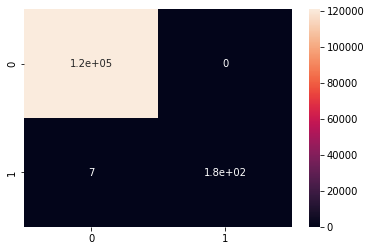

In [39]:
model = RandomForestClassifier(n_estimators=50, max_depth=10 ) 

model.fit(X_train, y_train) 

predictions= model.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

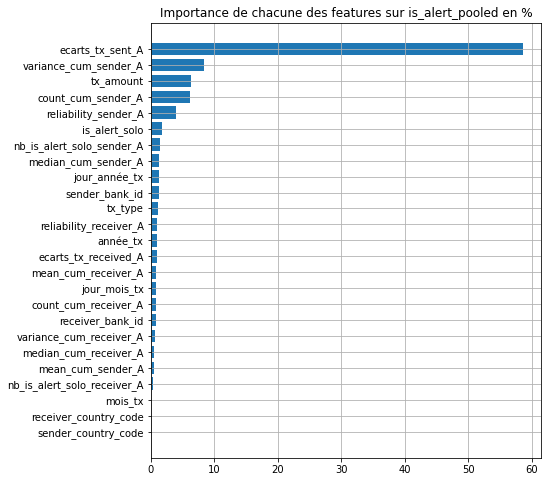

In [40]:
#RFClassifier
importances = model.feature_importances_

indices = np.argsort(importances)


fig, ax = plt.subplots(figsize=(7,8))
ax.barh(range(len(importances)), importances[indices]*100)
ax.set_yticks(range(len(importances)), colors='royalblue')
_ = ax.set_yticklabels(np.array(X_t.columns)[indices])
plt.grid()
plt.title("Importance de chacune des features sur is_alert_pooled en %")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120891
           1       1.00      0.96      0.98       184

    accuracy                           1.00    121075
   macro avg       1.00      0.98      0.99    121075
weighted avg       1.00      1.00      1.00    121075

[[120891      0]
 [     7    177]]


<AxesSubplot:>

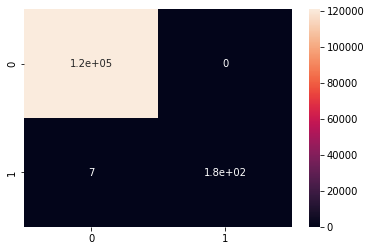

In [41]:
#xgb 
model = xgb.XGBClassifier()

model.fit(X_train, y_train) 

predictions= model.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

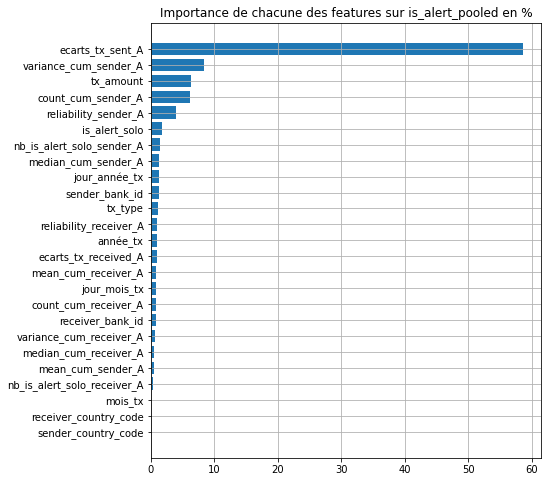

In [42]:
#xgb
importances = model.feature_importances_

indices = np.argsort(importances)


fig, ax = plt.subplots(figsize=(7,8))
ax.barh(range(len(importances)), importances[indices]*100)
ax.set_yticks(range(len(importances)), colors='royalblue')
_ = ax.set_yticklabels(np.array(X_t.columns)[indices])
plt.grid()
plt.title("Importance de chacune des features sur is_alert_pooled en %")
plt.show()

## On s'intéresse maintenant à `is_alert_solo`

In [263]:
X_train=df_3.drop(['is_alert_solo','is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp', 
                   'reliability_receiver_A', 'reliability_receiver_B','reliability_sender_A', 'reliability_sender_B',],axis=1)
y_train= df_3['is_alert_solo']

X_t=X_train.copy()

In [264]:
# On ne prend que les valeurs du mois prochain 
df4 = df_bis[(df_bis.timestamp<time_1_month)&(df_bis.timestamp>=time)]

X_test = df4.drop(['is_alert_solo','is_alert_pooled', 'sender_birth_date', 'receiver_birth_date','timestamp', 
                   'reliability_receiver_A', 'reliability_receiver_B','reliability_sender_A', 'reliability_sender_B',],axis=1)
y_test = df4['is_alert_solo']

print("% Test/(Test + Train) : "+  str(len(X_test)/(len(X_train)+len(X_test))*100))

% Test/(Test + Train) : 31.625843289145894


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    155524
           1       0.66      0.03      0.06      1004

    accuracy                           0.99    156528
   macro avg       0.83      0.52      0.53    156528
weighted avg       0.99      0.99      0.99    156528

[[155508     16]
 [   973     31]]


<AxesSubplot:>

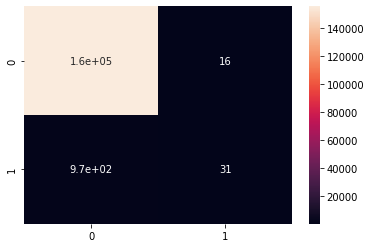

In [265]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #fit_transform is a easy way to do the following normally 
X_test= scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=50, max_depth=10 ) 

model.fit(X_train, y_train) 

predictions= model.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)